In [1]:
import pandas as pd

main_df = pd.read_csv('diabetic_data.csv') 

lookup_df = pd.read_csv('IDs_mapping.csv') 

print("Main Dataset Info:")
print(main_df.info())
print("\nLookup Dataset Head:")
print(lookup_df.head(10))
print("\nLookup Columns:", lookup_df.columns)

Main Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-nul

In [3]:
admission_type_data = []
discharge_data = []
admission_source_data = []

current_section = None

with open('IDs_mapping.csv', 'r') as file:
    for line in file:
        row = line.strip().split(',')
        if len(row) < 2 or row[0] == '':
            continue
        
        if 'admission_type_id' in row[0].lower():
            current_section = 'admission_type'
            continue
        elif 'discharge_disposition_id' in row[0].lower():
            current_section = 'discharge'
            continue
        elif 'admission_source_id' in row[0].lower():
            current_section = 'admission_source'
            continue
        
        if row[0].lower() == 'id' or 'description' in row:
            continue
        
        try:
            if current_section == 'admission_type':
                admission_type_data.append([int(row[0]), row[1]])
            elif current_section == 'discharge':
                discharge_data.append([int(row[0]), row[1]])
            elif current_section == 'admission_source':
                admission_source_data.append([int(row[0]), row[1]])
        except (ValueError, IndexError):
            continue  

admission_type_df = pd.DataFrame(admission_type_data, columns=['admission_type_id', 'admission_type_desc'])
discharge_df = pd.DataFrame(discharge_data, columns=['discharge_disposition_id', 'discharge_disposition_desc'])
admission_source_df = pd.DataFrame(admission_source_data, columns=['admission_source_id', 'admission_source_desc'])

print("Admission Type Mapping:")
print(admission_type_df.head())
print("\nDischarge Disposition Mapping:")
print(discharge_df.head())
print("\nAdmission Source Mapping:")
print(admission_source_df.head())

Admission Type Mapping:
   admission_type_id admission_type_desc
0                  1           Emergency
1                  2              Urgent
2                  3            Elective
3                  4             Newborn
4                  5       Not Available

Discharge Disposition Mapping:
   discharge_disposition_id                         discharge_disposition_desc
0                         1                                 Discharged to home
1                         2  Discharged/transferred to another short term h...
2                         3                      Discharged/transferred to SNF
3                         4                      Discharged/transferred to ICF
4                         5  Discharged/transferred to another type of inpa...

Admission Source Mapping:
   admission_source_id                            admission_source_desc
0                    1                               Physician Referral
1                    2                               

In [5]:
main_df['admission_type_id'] = pd.to_numeric(main_df['admission_type_id'], errors='coerce')
main_df['discharge_disposition_id'] = pd.to_numeric(main_df['discharge_disposition_id'], errors='coerce')
main_df['admission_source_id'] = pd.to_numeric(main_df['admission_source_id'], errors='coerce')

main_df = main_df.merge(admission_type_df, on='admission_type_id', how='left')
main_df = main_df.merge(discharge_df, on='discharge_disposition_id', how='left')
main_df = main_df.merge(admission_source_df, on='admission_source_id', how='left')

main_df['admission_type_desc'].fillna('Unknown', inplace=True)
main_df['discharge_disposition_desc'].fillna('Unknown', inplace=True)
main_df['admission_source_desc'].fillna('Unknown', inplace=True)

print(main_df[['admission_type_id', 'admission_type_desc', 
               'discharge_disposition_id', 'discharge_disposition_desc', 
               'admission_source_id', 'admission_source_desc']].head())

   admission_type_id admission_type_desc  discharge_disposition_id  \
0                  6                NULL                        25   
1                  1           Emergency                         1   
2                  1           Emergency                         1   
3                  1           Emergency                         1   
4                  1           Emergency                         1   

  discharge_disposition_desc  admission_source_id admission_source_desc  
0                 Not Mapped                    1    Physician Referral  
1         Discharged to home                    7        Emergency Room  
2         Discharged to home                    7        Emergency Room  
3         Discharged to home                    7        Emergency Room  
4         Discharged to home                    7        Emergency Room  


C:\Users\user\AppData\Local\Temp\ipykernel_17680\4151023749.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['admission_type_desc'].fillna('Unknown', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17680\4151023749.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [7]:
main_df.replace('?', pd.NA, inplace=True)

print(main_df.isnull().sum())

encounter_id                      0
patient_nbr                       0
race                           2273
gender                            0
age                               0
weight                        98569
admission_type_id                 0
discharge_disposition_id          0
admission_source_id               0
time_in_hospital                  0
payer_code                    40256
medical_specialty             49949
num_lab_procedures                0
num_procedures                    0
num_medications                   0
number_outpatient                 0
number_emergency                  0
number_inpatient                  0
diag_1                           21
diag_2                          358
diag_3                         1423
number_diagnoses                  0
max_glu_serum                 96420
A1Cresult                     84748
metformin                         0
repaglinide                       0
nateglinide                       0
chlorpropamide              

In [25]:
columns_to_drop = ['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']  
main_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

for col in ['race']:
    main_df[col].fillna(main_df[col].mode()[0], inplace=True)
    
main_df = main_df.loc[main_df.groupby('patient_nbr')['time_in_hospital'].idxmax()]

main_df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

print(main_df.isnull().sum())

C:\Users\user\AppData\Local\Temp\ipykernel_17680\1353344314.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df[col].fillna(main_df[col].mode()[0], inplace=True)


race                             0
gender                           0
age                              0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
diag_1                          11
diag_2                         287
diag_3                        1160
number_diagnoses                 0
metformin                        0
repaglinide                      0
nateglinide                      0
chlorpropamide                   0
glimepiride                      0
acetohexamide                    0
glipizide                        0
glyburide                        0
tolbutamide                      0
pioglitazone                     0
rosiglitazone                    0
acarbose            

In [27]:
main_df['readmitted_binary'] = main_df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [29]:
def map_diagnosis(code):
    if pd.isna(code):
        return 'Other'
    code = str(code)
    if code.startswith(('390', '391', '392', '393', '394', '395', '396', '397', '398', '399', 
                        '40', '41', '42', '43', '44', '45', '46')):
        return 'Circulatory'
    elif code.startswith('250'):
        return 'Diabetes'
    elif code.startswith(('460', '461', '462', '463', '464', '465', '466', '467', '468', '469', 
                          '47', '48', '49', '50', '51', '52')):
        return 'Respiratory'
    elif code.startswith(('520', '521', '522', '523', '524', '525', '526', '527', '528', '529', 
                          '53', '54', '55', '56', '57')):
        return 'Digestive'
    elif code.startswith(('580', '581', '582', '583', '584', '585', '586', '587', '588', '589')):
        return 'Genitourinary'
    elif code.startswith(('140', '141', '142', '143', '144', '145', '146', '147', '148', '149', 
                          '15', '16', '17', '18', '19', '20', '21', '22', '23', '24')):
        return 'Neoplasms'
    elif code.startswith(('800', '801', '802', '803', '804', '805', '806', '807', '808', '809', 
                          '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', 
                          '93', '94', '95', '96', '97', '98', '99')):
        return 'Injury'
    elif code.startswith(('710', '711', '712', '713', '714', '715', '716', '717', '718', '719', 
                          '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', 
                          '73')):
        return 'Musculoskeletal'
    else:
        return 'Other'

main_df['diag_1_group'] = main_df['diag_1'].apply(map_diagnosis)
main_df['diag_2_group'] = main_df['diag_2'].apply(map_diagnosis)
main_df['diag_3_group'] = main_df['diag_3'].apply(map_diagnosis)

In [31]:
categorical_cols = ['race', 'gender', 'age', 'admission_type_desc', 
                   'discharge_disposition_desc', 'admission_source_desc', 
                   'diag_1_group', 'diag_2_group', 'diag_3_group', 'metformin',
                    'repaglinide','nateglinide', 'chlorpropamide','glimepiride',
                    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                    'tolazamide', 'examide', 'citoglipton', 'insulin',
                    'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                    'metformin-pioglitazone', 'change', 'diabetesMed']

# One-hot encoding
main_df_encoded = pd.get_dummies(main_df, columns=categorical_cols, drop_first=True)

main_df_encoded.drop(columns=['admission_type_id', 'discharge_disposition_id', 
                             'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 
                             'readmitted'], inplace=True)

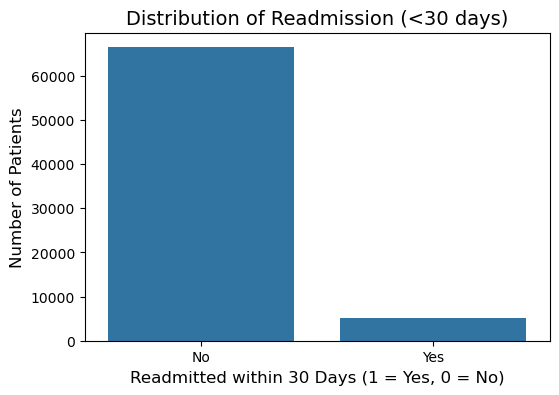

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted_binary', data=main_df)
plt.title('Distribution of Readmission (<30 days)', fontsize=14)
plt.xlabel('Readmitted within 30 Days (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

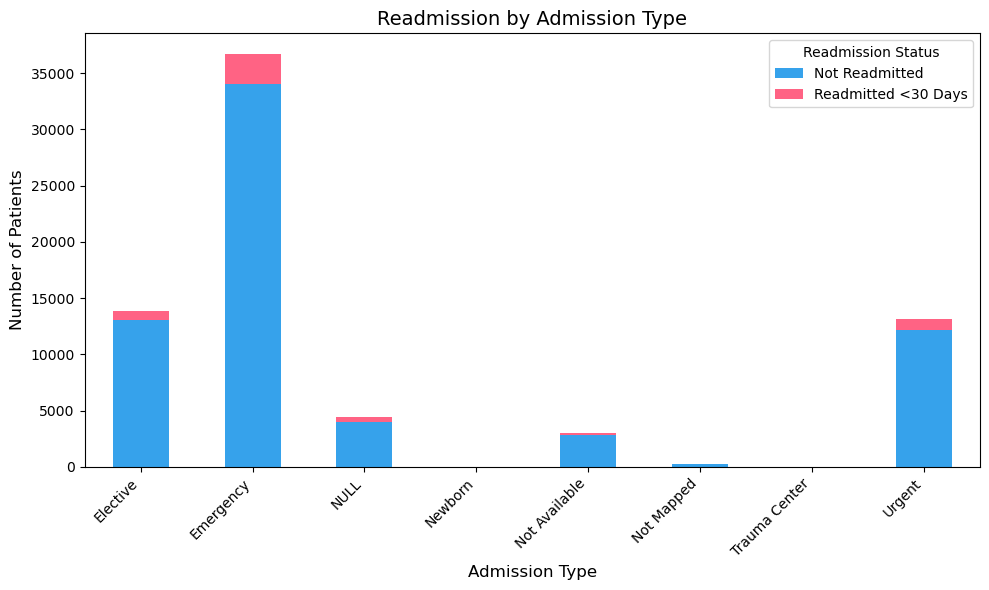

In [36]:
admission_readmission = main_df.groupby(['admission_type_desc', 'readmitted_binary']).size().unstack(fill_value=0)

admission_readmission.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#36A2EB', '#FF6384'])
plt.title('Readmission by Admission Type', fontsize=14)
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(['Not Readmitted', 'Readmitted <30 Days'], title='Readmission Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

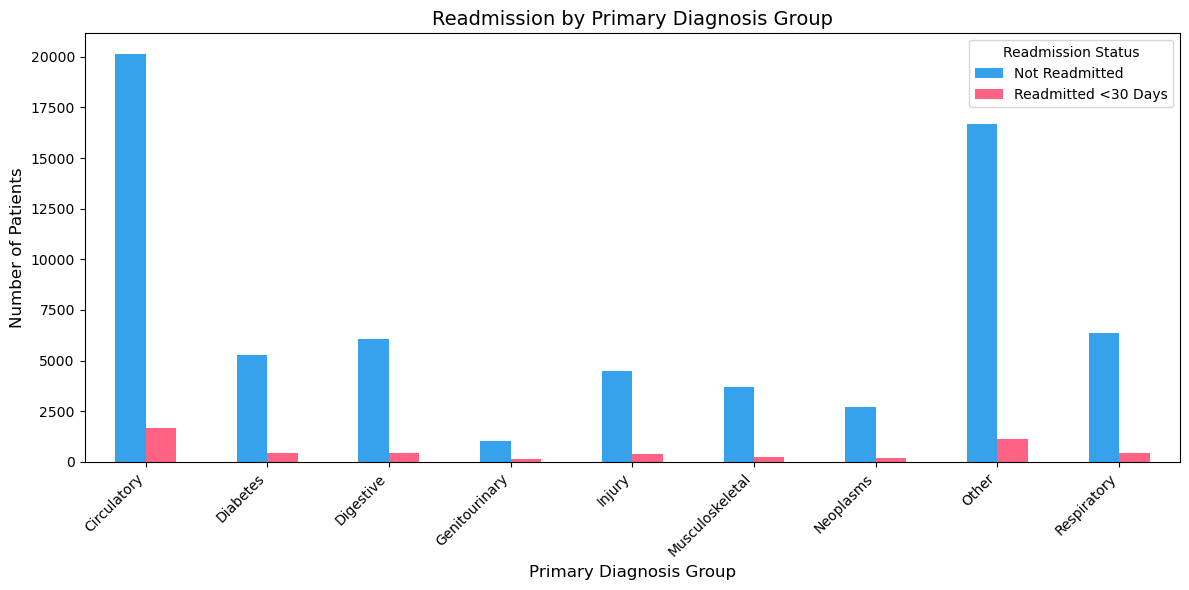

In [38]:
diag_readmission = main_df.groupby(['diag_1_group', 'readmitted_binary']).size().unstack(fill_value=0)

diag_readmission.plot(kind='bar', figsize=(12, 6), color=['#36A2EB', '#FF6384'])
plt.title('Readmission by Primary Diagnosis Group', fontsize=14)
plt.xlabel('Primary Diagnosis Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(['Not Readmitted', 'Readmitted <30 Days'], title='Readmission Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     13356
           1       0.15      0.01      0.01       948

    accuracy                           0.93     14304
   macro avg       0.54      0.50      0.49     14304
weighted avg       0.88      0.93      0.90     14304

ROC-AUC: 0.6268998161985384


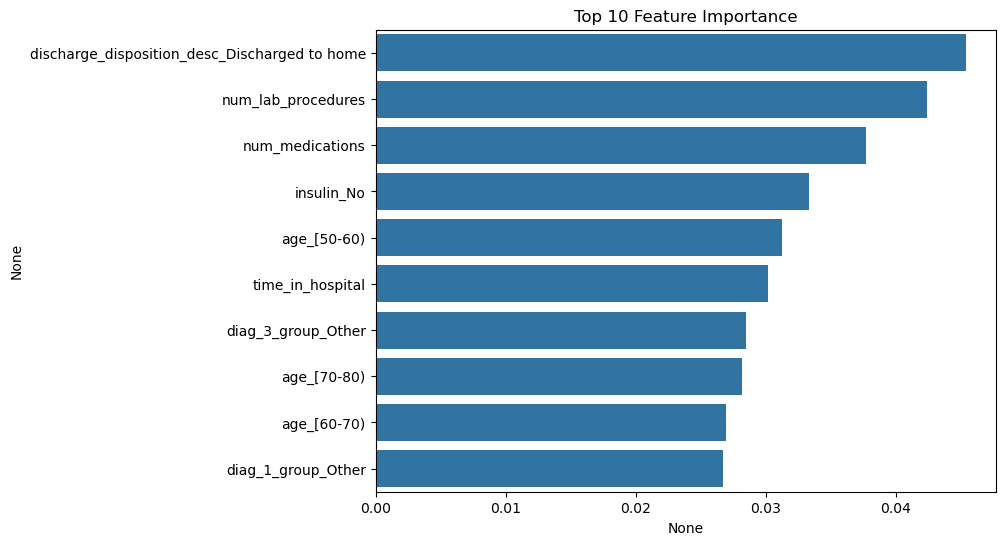

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

X = main_df_encoded.drop('readmitted_binary', axis=1)
y = main_df_encoded['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Top 10 Feature Importance')
plt.show()